### Problem Statement 

- Predicting if the cancer diagnosis is benign or malignant based on several observations/features 
- 30 features are used, examples:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

- Datasets are linearly separable using all 30 input features
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
         - Malignant
         - Benign


#### Data Preprocessing

In [1]:
# importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 8, 4
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
# looking at keys of the cancer dataset
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# understanding the proper dataset
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
# looking the the target name
print(cancer["target_names"])

# these are the two classes that we have to classify

['malignant' 'benign']


In [6]:
# looking at the actual target output
print(cancer["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

* here 0 -> malignant
* and 1 -> benign

In [7]:
# looking at the data
print(cancer["data"])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [8]:
# looking at the feature names
print(cancer["feature_names"])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# getting the shape of the data
cancer["data"].shape

(569, 30)

In [10]:
# now making the dataframe consisting of data , target as rows and feature_names , target as columns

dataset = pd.DataFrame(np.c_[cancer["data"] , cancer["target"]] , 
                       columns= np.append(cancer["feature_names"] , ["target"]))

dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [11]:
# renaming the columns names
dataset.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [12]:
dataset.columns = ["Mean_Radius" , "Mean_Texture" , "Mean_Perimeter" , "Mean_Area" , "Mean_Smoothness" , "Mean_Compactness" , 
                  "Mean_Concavity" , "Mean_Concave_Points" , "Mean_Symmetry" , "Mean_Fractal_Dimention" , "Radius_Error" , 
                   "Texture_Error" , "Perimeter_Error" , "Area_Error" , "Smoothness_Error" , "Compactness_Error" , 
                    "Concavity_Error" , "Concave_Points_Error" , "Symmetry_error" , 
                   "Fractal_Dimention_Error" , "Worst_Radius" , "Worst_Texture" , "Worst_Perimeter" , "Worst_Area" , 
                   "Worst_Smoothness" , "Worst_Compactness" , "Worst_concavity" , "Worst_Concave_Points" , "worst_Symmetry" , 
                   "Worst_Fractal_Dimention" , "Target"]
dataset.head()

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimention,...,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_concavity,Worst_Concave_Points,worst_Symmetry,Worst_Fractal_Dimention,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [13]:
# now understanding the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Mean_Radius              569 non-null    float64
 1   Mean_Texture             569 non-null    float64
 2   Mean_Perimeter           569 non-null    float64
 3   Mean_Area                569 non-null    float64
 4   Mean_Smoothness          569 non-null    float64
 5   Mean_Compactness         569 non-null    float64
 6   Mean_Concavity           569 non-null    float64
 7   Mean_Concave_Points      569 non-null    float64
 8   Mean_Symmetry            569 non-null    float64
 9   Mean_Fractal_Dimention   569 non-null    float64
 10  Radius_Error             569 non-null    float64
 11  Texture_Error            569 non-null    float64
 12  Perimeter_Error          569 non-null    float64
 13  Area_Error               569 non-null    float64
 14  Smoothness_Error         5

In [14]:
dataset.describe()

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimention,...,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_concavity,Worst_Concave_Points,worst_Symmetry,Worst_Fractal_Dimention,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
dataset.tail()

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimention,...,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_concavity,Worst_Concave_Points,worst_Symmetry,Worst_Fractal_Dimention,Target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


##### Data Visualization

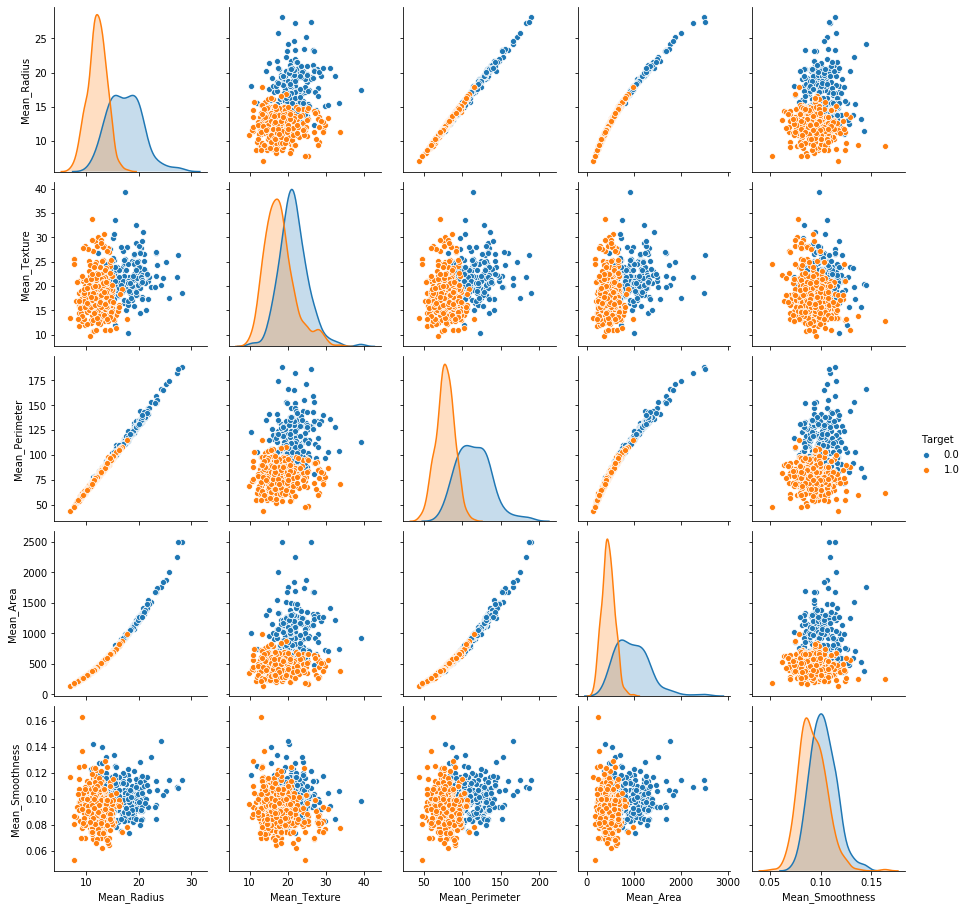

In [16]:
sns.pairplot(data = dataset , hue = "Target" , vars= ["Mean_Radius" , "Mean_Texture" , "Mean_Perimeter" ,
                                                      "Mean_Area" , "Mean_Smoothness"])
# here 0 -> malignant
# and 1 -> benign

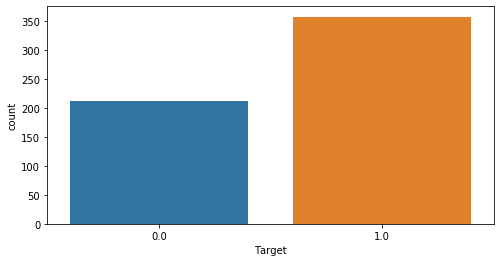

In [17]:
# get how many malignant and benign cases
sns.countplot(dataset["Target"])

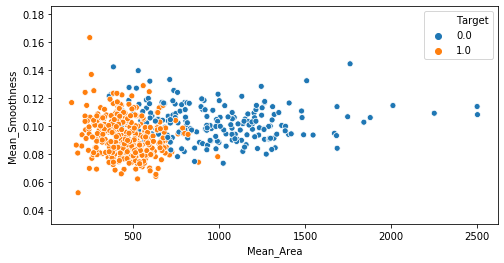

In [18]:
# understanding the data
sns.scatterplot(data = dataset , x = "Mean_Area" , y = "Mean_Smoothness" , hue = "Target")

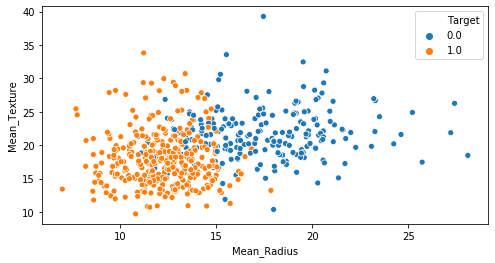

In [19]:
# understanding the data
sns.scatterplot(data = dataset , x = "Mean_Radius" , y = "Mean_Texture" , hue = "Target")

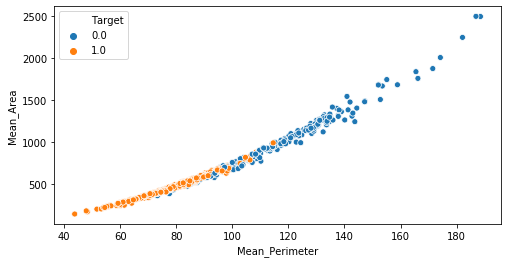

In [20]:
# understanding the data
sns.scatterplot(data = dataset , x = "Mean_Perimeter" , y = "Mean_Area" , hue = "Target")

#### Deploying the ML Model on the dataset

In [21]:
# splitting the dataset into independent(x) and dependent(y) dataset variable 
x = dataset.iloc[: , :31].values
y = dataset["Target"]

print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 4.601e-01 1.189e-01 0.000e+00]
 [2.057e+01 1.777e+01 1.329e+02 ... 2.750e-01 8.902e-02 0.000e+00]
 [1.969e+01 2.125e+01 1.300e+02 ... 3.613e-01 8.758e-02 0.000e+00]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 2.218e-01 7.820e-02 0.000e+00]
 [2.060e+01 2.933e+01 1.401e+02 ... 4.087e-01 1.240e-01 0.000e+00]
 [7.760e+00 2.454e+01 4.792e+01 ... 2.871e-01 7.039e-02 1.000e+00]]
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: Target, Length: 569, dtype: float64


In [22]:
# splitting the dataset into training and test dataset
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .20 , random_state = None)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[1.490e+01 2.253e+01 1.021e+02 ... 2.866e-01 1.155e-01 0.000e+00]
 [1.403e+01 2.125e+01 8.979e+01 ... 2.226e-01 7.617e-02 1.000e+00]
 [1.865e+01 1.760e+01 1.237e+02 ... 3.799e-01 9.185e-02 0.000e+00]
 ...
 [1.314e+01 2.074e+01 8.598e+01 ... 2.563e-01 8.174e-02 1.000e+00]
 [1.295e+01 1.602e+01 8.314e+01 ... 3.380e-01 9.584e-02 1.000e+00]
 [1.669e+01 2.020e+01 1.071e+02 ... 4.677e-01 7.623e-02 0.000e+00]]
[[1.071e+01 2.039e+01 6.950e+01 ... 2.605e-01 8.701e-02 1.000e+00]
 [2.137e+01 1.510e+01 1.413e+02 ... 2.730e-01 8.666e-02 0.000e+00]
 [1.480e+01 1.766e+01 9.588e+01 ... 3.600e-01 7.285e-02 1.000e+00]
 ...
 [1.289e+01 1.570e+01 8.408e+01 ... 1.999e-01 7.127e-02 1.000e+00]
 [2.161e+01 2.228e+01 1.444e+02 ... 3.828e-01 1.007e-01 0.000e+00]
 [1.315e+01 1.534e+01 8.531e+01 ... 3.849e-01 8.633e-02 1.000e+00]]
430    0.0
235    1.0
45     0.0
277    0.0
18     0.0
      ... 
293    1.0
525    1.0
466    1.0
292    1.0
489    0.0
Name: Target, Length: 455, dtype: float64
269    1.0
372    0.0

In [23]:
# implementing ML model on the training dataset
from sklearn.svm import SVC
classifier = SVC(kernel= "rbf" , random_state = None)
classifier.fit(x_train , y_train , sample_weight= None)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
#inisilizing the predicting val
y_preg = classifier.predict(x_test)

[[29 10]
 [ 2 73]]
Accuracy :  89.47368421052632 %


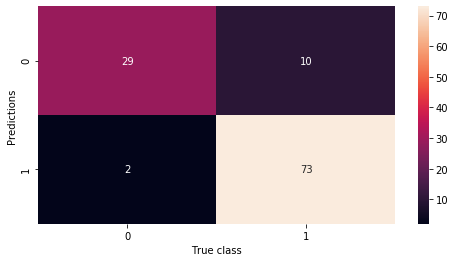

In [26]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_preg)
print(cm)

sns.heatmap(cm , annot= True)
plt.xlabel("True class")
plt.ylabel("Predictions")

accuracy = (29+73)/(29+73+10+2)
print("Accuracy : " , accuracy*100 , "%")

#### Improving the Classifier Model

for improving the model 
* normalized the data
* tunning the C and gamma parameter of support vector by grid search

In [27]:
# normalizing the training dataset
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled)
print(x_train_scaled.shape)

# normalizing the testing dataset
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled)


# all the values have changed between 0 - 1

(455, 31)


In [28]:
# implementing SVC on scaled training data
from sklearn.svm import SVC
classifier2 = SVC(kernel="rbf" , random_state = None)
classifier2.fit(x_train_scaled , y_train)

y_predict = classifier2.predict(x_test_scaled)



'Thus TYPE 2 Error has decreased'

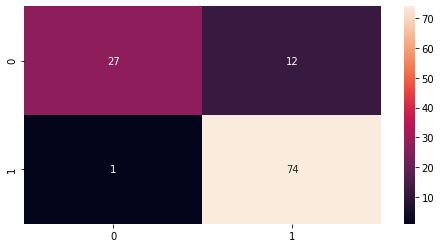

In [32]:
cm2 = confusion_matrix(y_test , y_predict)
sns.heatmap(data = cm2 , annot= True)



"""Thus TYPE 2 Error has decreased"""

In [34]:
from sklearn.metrics import classification_report
report = classification_report(y_test , y_predict)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.69      0.81        39
         1.0       0.86      0.99      0.92        75

    accuracy                           0.89       114
   macro avg       0.91      0.84      0.86       114
weighted avg       0.90      0.89      0.88       114



In [37]:
# tunning C and gamma parameters from gridsearch

from sklearn.model_selection import GridSearchCV
parameters = [{ "C" : [ 1,10,100,100 ], 
                "kernel" : ["rbf"] , 
                "gamma"  : [0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] }]

grid_search = GridSearchCV(estimator= classifier2 , param_grid= parameters , cv= 10 , n_jobs= -1)

grid_search = grid_search.fit(x_train_scaled , y_train)

best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}


In [39]:
# deploy SVC with grid search parameters
classifier3 = SVC(C= 100 , gamma= 0.5 , kernel= "rbf" , random_state = None)
classifier3.fit(x_train_scaled , y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
y_predic = classifier3.predict(x_test_scaled)

[[34  5]
 [ 1 74]]
Accuracy of the Classifier : 94.73684210526315 %
              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92        39
         1.0       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



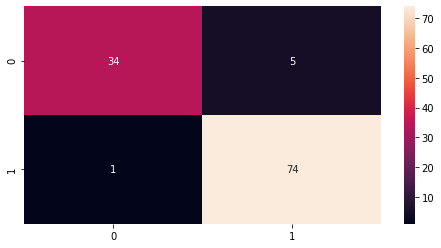

In [45]:
# making the confusion matrix and classification report 
cm3 = confusion_matrix(y_test , y_predic)
print(cm3)

accuracy = (34+74)/(34+74+1+5)
print("Accuracy of the Classifier :" , accuracy*100 , "%")

sns.heatmap(data = cm3 , annot= True)

report = classification_report(y_test , y_predic)
print(report)



* This is the final result and as you can see you result has also improved 